In [134]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
geopy                     1.18.1                     py_0    conda-forge
Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
folium                    0.5.0                      py_0    conda-forge
Folium installed
Libraries imported.


### We have loaded required libraries for data processing by import function
### then we used our data foursqaure account for the exploring 

In [135]:
CLIENT_ID = 'your id' # your Foursquare ID
CLIENT_SECRET = 'ur Code' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: OFPXVQCD2Z1E5M4N4RCF3IG0BAN2OPDJHMCQHFTEPUVGTXZN
CLIENT_SECRET:ECZH0LNZZMD2ROGSLSPJFWA5TWYXNKUGIMGE45PZX5OBFYBF


In [136]:
from geopy.geocoders import Nominatim
address = '102 North End Ave, New York, NY'

geolocator = Nominatim(user_agent="foursquare_agent")
location1 = geolocator.geocode(address)
latitude1 = location1.latitude
longitude1 = location1.longitude
print(latitude1, longitude1)

40.7149555 -74.0153365


In [137]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')


Data downloaded!


In [10]:
import json
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data) 
newyork_data

{'bbox': [-74.2492599487305,
  40.5033187866211,
  -73.7061614990234,
  40.9105606079102],
 'crs': {'properties': {'name': 'urn:ogc:def:crs:EPSG::4326'}, 'type': 'name'},
 'features': [{'geometry': {'coordinates': [-73.84720052054902,
     40.89470517661],
    'type': 'Point'},
   'geometry_name': 'geom',
   'id': 'nyu_2451_34572.1',
   'properties': {'annoangle': 0.0,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661],
    'borough': 'Bronx',
    'name': 'Wakefield',
    'stacked': 1},
   'type': 'Feature'},
  {'geometry': {'coordinates': [-73.82993910812398, 40.87429419303012],
    'type': 'Point'},
   'geometry_name': 'geom',
   'id': 'nyu_2451_34572.2',
   'properties': {'annoangle': 0.0,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.874294193

In [138]:

column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
neighborhoods.head()


,Borough,Neighborhood,Latitude,Longitude


In [12]:
neighborhoods_data = newyork_data['features']
neighborhoods_data 

[{'geometry': {'coordinates': [-73.84720052054902, 40.89470517661],
   'type': 'Point'},
  'geometry_name': 'geom',
  'id': 'nyu_2451_34572.1',
  'properties': {'annoangle': 0.0,
   'annoline1': 'Wakefield',
   'annoline2': None,
   'annoline3': None,
   'bbox': [-73.84720052054902,
    40.89470517661,
    -73.84720052054902,
    40.89470517661],
   'borough': 'Bronx',
   'name': 'Wakefield',
   'stacked': 1},
  'type': 'Feature'},
 {'geometry': {'coordinates': [-73.82993910812398, 40.87429419303012],
   'type': 'Point'},
  'geometry_name': 'geom',
  'id': 'nyu_2451_34572.2',
  'properties': {'annoangle': 0.0,
   'annoline1': 'Co-op',
   'annoline2': 'City',
   'annoline3': None,
   'bbox': [-73.82993910812398,
    40.87429419303012,
    -73.82993910812398,
    40.87429419303012],
   'borough': 'Bronx',
   'name': 'Co-op City',
   'stacked': 2},
  'type': 'Feature'},
 {'geometry': {'coordinates': [-73.82780644716412, 40.887555677350775],
   'type': 'Point'},
  'geometry_name': 'geom',


In [139]:


for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [140]:
neighborhoods.head(5)

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [141]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [142]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location1 = geolocator.geocode(address)
latitude1 = location1.latitude
longitude1 = location1.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude1, longitude1))

The geograpical coordinate of New York City are 40.7308619, -73.9871558.


In [17]:
map_newyork = folium.Map(location=[latitude1, longitude1], zoom_start=5)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

# Toranto data loading

In [143]:
import pandas as pd
tables= pd.read_html("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M",header=0)
tables[0]
df=pd.DataFrame(tables[0])
df.head(5)

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [144]:
filt = df[df.Borough != "Not assigned"]
def handle_non_assigned(row):
#    print(row)
    if(row.Neighbourhood == "Not assigned"):
        row["Neighbourhood"] = row["Borough"]
        return row
    else:
        return row
    
filtered = filt.apply(handle_non_assigned, axis=1)
filtered
x = filtered.groupby(["Postcode", "Borough"])["Neighbourhood"].apply(lambda x: ",".join(x)).reset_index()
x.head(5)

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [145]:
url = 'http://cocl.us/Geospatial_data'
lat_long = pd.read_csv(url)
lat_long.head()


,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [146]:
final_result= x.set_index('Postcode').join(lat_long.set_index('Postal Code'))
final_result.rename(columns={"Postcode": "Postcode1", 
                     "Borough":"Borough2","Neighbourhood":"Neighbourhood2","Latitude":"Latitude2","Longitude":"Longitude2"}, 
                                 inplace = True) 
final_result.head(5)



,Borough2,Neighbourhood2,Latitude2,Longitude2
Postcode,,,,
M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
M1G,Scarborough,Woburn,43.770992,-79.216917
M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [147]:
add = 'Toronto, Canada'

geolocator = Nominatim(user_agent='foursquare_agent')
location2 = geolocator.geocode(add)
latitude2 = location2.latitude
longitude2 = location2.longitude
print('The geograpical coordinate of Toronto, Canada are {}, {}.'.format(latitude2, longitude2))

The geograpical coordinate of Toronto, Canada are 43.653963, -79.387207.


In [148]:
map_toro = folium.Map(location=[latitude2, longitude2], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(final_result['Latitude2'], final_result['Longitude2'], final_result['Borough2'], final_result['Neighbourhood2']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [149]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [150]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    LIMIT = 100 # limit of number of venues returned by Foursquare API
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [105]:
toronto_venues = getNearbyVenues(names=final_result['Neighbourhood2'],
                                   latitudes=final_result['Latitude2'],
                                   longitudes=final_result['Longitude2']
                                  )
toronto_venues

Rouge,Malvern
Highland Creek,Rouge Hill,Port Union
Guildwood,Morningside,West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park,Ionview,Kennedy Park
Clairlea,Golden Mile,Oakridge
Cliffcrest,Cliffside,Scarborough Village West
Birch Cliff,Cliffside West
Dorset Park,Scarborough Town Centre,Wexford Heights
Maryvale,Wexford
Agincourt
Clarks Corners,Sullivan,Tam O'Shanter
Agincourt North,L'Amoreaux East,Milliken,Steeles East
L'Amoreaux West,Steeles West
Upper Rouge
Hillcrest Village
Fairview,Henry Farm,Oriole
Bayview Village
Silver Hills,York Mills
Newtonbrook,Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park,Don Mills South
Bathurst Manor,Downsview North,Wilson Heights
Northwood Park,York University
CFB Toronto,Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Woodbine Gardens,Parkview Hill
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West,Riverdale
The Beac

,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Rouge,Malvern",43.806686,-79.194353,Wendy's,43.807448,-79.199056,Fast Food Restaurant
1,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
2,"Guildwood,Morningside,West Hill",43.763573,-79.188711,Swiss Chalet Rotisserie & Grill,43.767697,-79.189914,Pizza Place
3,"Guildwood,Morningside,West Hill",43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store
4,"Guildwood,Morningside,West Hill",43.763573,-79.188711,Marina Spa,43.766000,-79.191000,Spa
5,"Guildwood,Morningside,West Hill",43.763573,-79.188711,Big Bite Burrito,43.766299,-79.190720,Mexican Restaurant
6,"Guildwood,Morningside,West Hill",43.763573,-79.188711,Enterprise Rent-A-Car,43.764076,-79.193406,Rental Car Location
7,"Guildwood,Morningside,West Hill",43.763573,-79.188711,Woburn Medical Centre,43.766631,-79.192286,Medical Center
8,"Guildwood,Morningside,West Hill",43.763573,-79.188711,Lawrence Ave E & Kingston Rd,43.767704,-79.189490,Intersection
9,"Guildwood,Morningside,West Hill",43.763573,-79.188711,Eggsmart,43.767800,-79.190466,Breakfast Spot


In [151]:
df1 = x.set_index('Postcode').join(lat_long.set_index('Postal Code'))
df1.head(5)

,Borough,Neighbourhood,Latitude,Longitude
Postcode,,,,
M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
M1G,Scarborough,Woburn,43.770992,-79.216917
M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [152]:
search_query = 'Italian'
radius = 500
print(search_query + ' .... OK!')

Italian .... OK!


In [153]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude2, longitude2, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=OFPXVQCD2Z1E5M4N4RCF3IG0BAN2OPDJHMCQHFTEPUVGTXZN&client_secret=ECZH0LNZZMD2ROGSLSPJFWA5TWYXNKUGIMGE45PZX5OBFYBF&ll=43.653963,-79.387207&v=20180604&query=Italian&radius=500&limit=30'

In [30]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5c9856b54434b9611a420fad'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/embassy_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d12c951735',
      'name': 'Embassy / Consulate',
      'pluralName': 'Embassies / Consulates',
      'primary': True,
      'shortName': 'Embassy'}],
    'hasPerk': False,
    'id': '4bfc0289c3ba9521c00f9653',
    'location': {'address': '136 Beverley St',
     'cc': 'CA',
     'city': 'Toronto',
     'country': 'Canada',
     'crossStreet': 'Dundas Street',
     'distance': 555,
     'formattedAddress': ['136 Beverley St (Dundas Street)',
      'Toronto ON',
      'Canada'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.65402694219784,
       'lng': -79.39410374006685}],
     'lat': 43.65402694219784,
     'lng': -79.39410374006685,
     'state': 'ON'},
    'name': 'Italian Consulate Toronto',
    'referralId': 'v-1553487541'},
   {'ca

In [154]:
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()
print('total resaurants in toronto are ',len(dataframe))

total resaurants in toronto are  9


In [155]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered
df_toro=dataframe_filtered[['name','categories','city']]
df_toro.rename(columns={'name':'type of restaurant in Toronto','city':'Toronto'},inplace=True)
df_toro

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,type of restaurant in Toronto,categories,Toronto
0,Italian Consulate Toronto,Embassy / Consulate,Toronto
1,The Fresh Italian,Italian Restaurant,Toronto
2,The Fresh Italian Eatery,Italian Restaurant,Toronto
3,Mustachio Italian Eatery,Italian Restaurant,Toronto
4,LA's Italian + Bar,Italian Restaurant,NaN
5,Classic italian style pizza food truck,Food Truck,Toronto
6,john's italian cafe,Italian Restaurant,Toronto
7,Sbarro,Pizza Place,Toronto
8,Little Anthony's,Italian Restaurant,Toronto


In [156]:
toro=df_toro.groupby('categories').count()
toro

,type of restaurant in Toronto,Toronto
categories,,
Embassy / Consulate,1,1
Food Truck,1,1
Italian Restaurant,6,5
Pizza Place,1,1


In [159]:
resto_toro=dataframe_filtered.groupby('categories').count()
resto_toro

,name,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
categories,,,,,,,,,,,,,,
Embassy / Consulate,1,1,1,1,1,1,1,1,1,1,1,0,1,1
Food Truck,1,1,1,1,1,0,1,1,1,1,1,0,1,1
Italian Restaurant,6,4,6,5,6,3,6,6,6,6,6,3,5,6
Pizza Place,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [160]:
url1 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude1, longitude1, VERSION, search_query, radius, LIMIT)
url1

'https://api.foursquare.com/v2/venues/search?client_id=OFPXVQCD2Z1E5M4N4RCF3IG0BAN2OPDJHMCQHFTEPUVGTXZN&client_secret=ECZH0LNZZMD2ROGSLSPJFWA5TWYXNKUGIMGE45PZX5OBFYBF&ll=40.7308619,-73.9871558&v=20180604&query=Italian&radius=500&limit=30'

In [37]:
results1 = requests.get(url1).json()
results1

{'meta': {'code': 200, 'requestId': '5c9857199fb6b73b71c00e6c'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d110941735',
      'name': 'Italian Restaurant',
      'pluralName': 'Italian Restaurants',
      'primary': True,
      'shortName': 'Italian'}],
    'hasPerk': False,
    'id': '58dd8ac3a8b75966fda9a547',
    'location': {'address': '345 E 6th St',
     'cc': 'US',
     'city': 'New York',
     'country': 'United States',
     'crossStreet': '1st and 2nd Ave',
     'distance': 482,
     'formattedAddress': ['345 E 6th St (1st and 2nd Ave)',
      'New York, NY 10003',
      'United States'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.726556174383305,
       'lng': -73.98651414092868}],
     'lat': 40.726556174383305,
     'lng': -73.98651414092868,
     'postalCode': '10003',
     'state': 'NY'},
    'name': 'Tableside Italian Cook Sh

In [161]:
venues_newyork = results1['response']['venues']

# tranform venues into a dataframe
dataframe1 = json_normalize(venues_newyork)
dataframe1.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'icon': {'suffix': '.png', 'prefix': 'https:...",False,58dd8ac3a8b75966fda9a547,345 E 6th St,US,New York,United States,1st and 2nd Ave,482,"[345 E 6th St (1st and 2nd Ave), New York, NY ...","[{'label': 'display', 'lng': -73.9865141409286...",40.726556,-73.986514,10003,NY,Tableside Italian Cook Shoppe,v-1553487641,427907002
1,"[{'icon': {'suffix': '.png', 'prefix': 'https:...",False,4b047a7bf964a5207f5422e3,108 E 16th St,US,New York,United States,btwn Union Square E & Irving Pl,561,[108 E 16th St (btwn Union Square E & Irving P...,"[{'label': 'display', 'lng': -73.9888584054704...",40.735738,-73.988858,10003,NY,Italian Wine Merchants,v-1553487641,NaN
2,"[{'icon': {'suffix': '.png', 'prefix': 'https:...",False,4bca330368f976b0fce75e83,13th Street,US,New York,United States,Third Avenue,237,"[13th Street (Third Avenue), New York, NY 1000...","[{'label': 'display', 'lng': -73.988219, 'lat'...",40.732834,-73.988219,10003,NY,Italian Sparkle Palace,v-1553487641,NaN
3,"[{'icon': {'suffix': '.png', 'prefix': 'https:...",False,51dccc59498ed4c3651a098c,Hester St,US,New York,United States,Mulberry,156,"[Hester St (Mulberry), New York, NY, United St...","[{'label': 'display', 'lng': -73.9874134175116...",40.732256,-73.987413,NaN,NY,Lusterini Italian Restaurant,v-1553487641,NaN
4,"[{'icon': {'suffix': '.png', 'prefix': 'https:...",False,4f328c7c19836c91c7e299c5,328 E 14th St,US,New York,United States,NaN,350,"[328 E 14th St, New York, NY 10003, United Sta...","[{'label': 'display', 'lng': -73.983114, 'lat'...",40.731577,-73.983114,10003,NY,Johnny Mozzarella's Italian Eatery and Cafe,v-1553487641,NaN


In [162]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe1.columns if col.startswith('location.')] + ['id']
dataframe_filtered1 = dataframe1.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue_newyork.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered1['categories'] = dataframe_filtered1.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered1.columns = [column.split('.')[-1] for column in dataframe_filtered1.columns]

dataframe_filtered1
df_newyork=dataframe_filtered1[['name','categories','city']]
df_newyork.rename(columns={'name':'type of Restaurant is New York','city':'New york'},inplace=True)
df_newyork

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,type of Restaurant is New York,categories,New york
0,Tableside Italian Cook Shoppe,Italian Restaurant,New York
1,Italian Wine Merchants,Wine Shop,New York
2,Italian Sparkle Palace,Italian Restaurant,New York
3,Lusterini Italian Restaurant,Italian Restaurant,New York
4,Johnny Mozzarella's Italian Eatery and Cafe,Food,New York
5,Johns Italian,Italian Restaurant,New York
6,Modern Kitchen Design Cabinets | Cesar NYC,Business Service,New York
7,Gelato Classica Italiana,Italian Restaurant,New York
8,Russo Mozzarella & Pasta,Gourmet Shop,New York


In [163]:
newyork=df_newyork.groupby('categories').count()
newyork

,type of Restaurant is New York,New york
categories,,
Business Service,1,1
Food,1,1
Gourmet Shop,1,1
Italian Restaurant,5,5
Wine Shop,1,1


In [164]:
resto_newyork=dataframe_filtered1.groupby('categories').count()
resto_newyork

,name,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
categories,,,,,,,,,,,,,,
Business Service,1,1,1,1,1,0,1,1,1,1,1,1,1,1
Food,1,1,1,1,1,0,1,1,1,1,1,1,1,1
Gourmet Shop,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Italian Restaurant,5,4,5,5,5,3,5,5,5,5,5,3,5,5
Wine Shop,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [128]:
 #resto_newyork=df_toro.groupby('categories').count()
#resto_toro=df_newyork.groupby('categories').count()
result1 = pd.concat([newyork,toro],axis=1)
result1.drop(columns=['New york','Toronto'],inplace=True)
result1


,type of Restaurant is New York,type of restaurant in Toronto
Business Service,1.0,NaN
Embassy / Consulate,NaN,1.0
Food,1.0,NaN
Food Truck,NaN,1.0
Gourmet Shop,1.0,NaN
Italian Restaurant,5.0,6.0
Pizza Place,NaN,1.0
Wine Shop,1.0,NaN


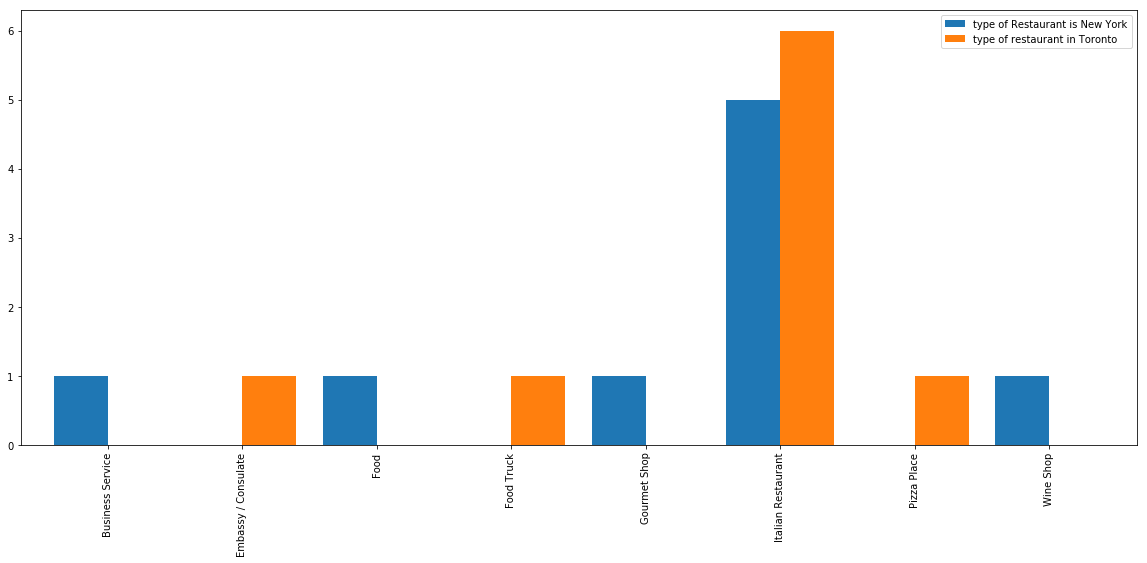

In [165]:
import matplotlib as mpl
import matplotlib.pyplot as plt
result1.plot(kind='bar', figsize=(20, 8), rot=90,width=0.8)




   # conclusion
   
   #### Hence the new bussiness parson can   start there bussiness Services, pizza place at New york City and food truck, embassy, wine shop at the toronto 
        